In [1]:
import numpy as np
import pandas as pd

In [2]:
train_features = pd.read_csv('../input/lish-moa/train_features.csv')
train_targets_scored = pd.read_csv('../input/lish-moa/train_targets_scored.csv')
train_targets_nonscored = pd.read_csv('../input/lish-moa/train_targets_nonscored.csv')
test_features = pd.read_csv('../input/lish-moa/test_features.csv')
train_drug = pd.read_csv("../input/lish-moa/train_drug.csv")

data = train_features.append(test_features)

ss = pd.read_csv('../input/lish-moa/sample_submission.csv')

In [3]:
train_features

sig_id      cp_type  cp_time cp_dose     g-0     g-1     g-2  \
0      id_000644bb2       trt_cp       24      D1  1.0620  0.5577 -0.2479   
1      id_000779bfc       trt_cp       72      D1  0.0743  0.4087  0.2991   
2      id_000a6266a       trt_cp       48      D1  0.6280  0.5817  1.5540   
3      id_0015fd391       trt_cp       48      D1 -0.5138 -0.2491 -0.2656   
4      id_001626bd3       trt_cp       72      D2 -0.3254 -0.4009  0.9700   
...             ...          ...      ...     ...     ...     ...     ...   
23809  id_fffb1ceed       trt_cp       24      D2  0.1394 -0.0636 -0.1112   
23810  id_fffb70c0c       trt_cp       24      D2 -1.3260  0.3478 -0.3743   
23811  id_fffc1c3f4  ctl_vehicle       48      D2  0.3942  0.3756  0.3109   
23812  id_fffcb9e7c       trt_cp       24      D1  0.6660  0.2324  0.4392   
23813  id_ffffdd77b       trt_cp       72      D1 -0.8598  1.0240 -0.1361   

          g-3     g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94  \
0     -0.6208 -0.1944 -1.0120  ...  0.2862  0.2584  0.8076  0.5523 -0.1912   
1      0.0604  1.0190  0.5207  ... -0.4265  0.7543  0.4708  0.0230  0.2957   
2     -0.0764 -0.0323  1.2390  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240   
3      0.5288  4.0620 -0.8095  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632   
4      0.6919  1.4180 -0.8244  ...  0.0042  0.0048  0.6670  1.0690  0.5523   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
23809 -0.5080 -0.4713  0.7201  ...  0.1969  0.0262 -0.8121  0.3434  0.5372   
23810  0.9905 -0.7178  0.6621  ...  0.4286  0.4426  0.0423 -0.3195 -0.8086   
23811 -0.7389  0.5505 -0.0159  ...  0.5409  0.3755  0.7343  0.2807  0.4116   
23812  0.2044  0.8531 -0.0343  ... -0.1105  0.4258 -0.2012  0.1506  1.5230   
23813  0.7952 -0.3611 -3.6750  ... -3.3890 -1.7450 -6.6300 -4.0950 -7.3860   

         c-95    c-96    c-97    c-98    c-99  
0      0.6584 -0.3981  0.2139  0.3801  0.4176  
1      0.4899  0.1522  0.1241  0.6077  0.7371  
2     -0.3174 -0.6417 -0.2187 -1.4080  0.6931  
3     -1.2880 -1.6210 -0.8784 -0.3876 -0.8154  
4     -0.3031  0.1094  0.2885 -0.3786  0.7125  
...       ...     ...     ...     ...     ...  
23809 -0.3246  0.0631  0.9171  0.5258  0.4680  
23810 -0.9798 -0.2084 -0.1224 -0.2715  0.3689  
23811  0.6422  0.2256  0.7592  0.6656  0.3808  
23812  0.7101  0.1732  0.7015 -0.6290  0.0740  
23813 -1.4160 -3.5770 -0.4775 -2.1500 -4.2520  

[23814 rows x 876 columns]

In [4]:
test_features

sig_id      cp_type  cp_time cp_dose     g-0     g-1     g-2  \
0     id_0004d9e33       trt_cp       24      D1 -0.5458  0.1306 -0.5135   
1     id_001897cda       trt_cp       72      D1 -0.1829  0.2320  1.2080   
2     id_002429b5b  ctl_vehicle       24      D1  0.1852 -0.1404 -0.3911   
3     id_00276f245       trt_cp       24      D2  0.4828  0.1955  0.3825   
4     id_0027f1083       trt_cp       48      D1 -0.3979 -1.2680  1.9130   
...            ...          ...      ...     ...     ...     ...     ...   
3977  id_ff7004b87       trt_cp       24      D1  0.4571 -0.5743  3.3930   
3978  id_ff925dd0d       trt_cp       24      D1 -0.5885 -0.2548  2.5850   
3979  id_ffb710450       trt_cp       72      D1 -0.3985 -0.1554  0.2677   
3980  id_ffbb869f2       trt_cp       48      D2 -1.0960 -1.7750 -0.3977   
3981  id_ffd5800b6       trt_cp       72      D1 -0.5174  0.2953  0.3286   

         g-3     g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94  \
0     0.4408  1.5500 -0.1644  ...  0.0981  0.7978 -0.1430 -0.2067 -0.2303   
1    -0.4522 -0.3652 -0.3319  ... -0.1190 -0.1852 -1.0310 -1.3670 -0.3690   
2     0.1310 -1.4380  0.2455  ... -0.2261  0.3370 -1.3840  0.8604 -1.9530   
3     0.4244 -0.5855 -1.2020  ...  0.1260  0.1570 -0.1784 -1.1200 -0.4325   
4     0.2057 -0.5864 -0.0166  ...  0.4965  0.7578 -0.1580  1.0510  0.5742   
...      ...     ...     ...  ...     ...     ...     ...     ...     ...   
3977 -0.6202  0.8557  1.6240  ... -1.1790 -0.6422 -0.4367  0.0159 -0.6539   
3978  0.3456  0.4401  0.3107  ...  0.0210  0.5780 -0.5888  0.8057  0.9312   
3979 -0.6813  0.0152  0.4791  ...  0.4418  0.9153 -0.1862  0.4049  0.9568   
3980  1.0160 -1.3350 -0.2207  ...  0.3079 -0.4473 -0.8192  0.7785  0.3133   
3981 -0.0428 -0.0800  0.8702  ...  0.0363  0.1708  0.5939 -0.0507  0.2811   

        c-95    c-96    c-97    c-98    c-99  
0    -0.1193  0.0210 -0.0502  0.1510 -0.7750  
1    -0.5382  0.0359 -0.4764 -1.3810 -0.7300  
2    -1.0140  0.8662  1.0160  0.4924 -0.1942  
3    -0.9005  0.8131 -0.1305  0.5645 -0.5809  
4     1.0900 -0.2962 -0.5313  0.9931  1.8380  
...      ...     ...     ...     ...     ...  
3977 -0.4791 -1.2680 -1.1280 -0.4167 -0.6600  
3978  1.2730  0.2614 -0.2790 -0.0131 -0.0934  
3979  0.4666  0.0461  0.5888 -0.4205 -0.1504  
3980  0.1286 -0.2618  0.5074  0.7430 -0.0484  
3981 -0.4041 -0.4948  0.0757 -0.1356  0.5280  

[3982 rows x 876 columns]

In [5]:
ss

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0     id_0004d9e33                          0.5                     0.5   
1     id_001897cda                          0.5                     0.5   
2     id_002429b5b                          0.5                     0.5   
3     id_00276f245                          0.5                     0.5   
4     id_0027f1083                          0.5                     0.5   
...            ...                          ...                     ...   
3977  id_ff7004b87                          0.5                     0.5   
3978  id_ff925dd0d                          0.5                     0.5   
3979  id_ffb710450                          0.5                     0.5   
3980  id_ffbb869f2                          0.5                     0.5   
3981  id_ffd5800b6                          0.5                     0.5   

      acat_inhibitor  acetylcholine_receptor_agonist  \
0                0.5                             0.5   
1                0.5                             0.5   
2                0.5                             0.5   
3                0.5                             0.5   
4                0.5                             0.5   
...              ...                             ...   
3977             0.5                             0.5   
3978             0.5                             0.5   
3979             0.5                             0.5   
3980             0.5                             0.5   
3981             0.5                             0.5   

      acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                   0.5                             0.5   
1                                   0.5                             0.5   
2                                   0.5                             0.5   
3                                   0.5                             0.5   
4                                   0.5                             0.5   
...                                 ...                             ...   
3977                                0.5                             0.5   
3978                                0.5                             0.5   
3979                                0.5                             0.5   
3980                                0.5                             0.5   
3981                                0.5                             0.5   

      adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                            0.5                            0.5   
1                            0.5                            0.5   
2                            0.5                            0.5   
3                            0.5                            0.5   
4                            0.5                            0.5   
...                          ...                            ...   
3977                         0.5                            0.5   
3978                         0.5                            0.5   
3979                         0.5                            0.5   
3980                         0.5                            0.5   
3981                         0.5                            0.5   

      adenylyl_cyclase_activator  ...  tropomyosin_receptor_kinase_inhibitor  \
0                            0.5  ...                                    0.5   
1                            0.5  ...                                    0.5   
2                            0.5  ...                                    0.5   
3                            0.5  ...                                    0.5   
4                            0.5  ...                                    0.5   
...                          ...  ...                                    ...   
3977                         0.5  ...                                    0.5   
3978                         0.5  ...                                    0.5   
3979        

In [6]:
train_features.columns.tolist()

['sig_id',
 'cp_type',
 'cp_time',
 'cp_dose',
 'g-0',
 'g-1',
 'g-2',
 'g-3',
 'g-4',
 'g-5',
 'g-6',
 'g-7',
 'g-8',
 'g-9',
 'g-10',
 'g-11',
 'g-12',
 'g-13',
 'g-14',
 'g-15',
 'g-16',
 'g-17',
 'g-18',
 'g-19',
 'g-20',
 'g-21',
 'g-22',
 'g-23',
 'g-24',
 'g-25',
 'g-26',
 'g-27',
 'g-28',
 'g-29',
 'g-30',
 'g-31',
 'g-32',
 'g-33',
 'g-34',
 'g-35',
 'g-36',
 'g-37',
 'g-38',
 'g-39',
 'g-40',
 'g-41',
 'g-42',
 'g-43',
 'g-44',
 'g-45',
 'g-46',
 'g-47',
 'g-48',
 'g-49',
 'g-50',
 'g-51',
 'g-52',
 'g-53',
 'g-54',
 'g-55',
 'g-56',
 'g-57',
 'g-58',
 'g-59',
 'g-60',
 'g-61',
 'g-62',
 'g-63',
 'g-64',
 'g-65',
 'g-66',
 'g-67',
 'g-68',
 'g-69',
 'g-70',
 'g-71',
 'g-72',
 'g-73',
 'g-74',
 'g-75',
 'g-76',
 'g-77',
 'g-78',
 'g-79',
 'g-80',
 'g-81',
 'g-82',
 'g-83',
 'g-84',
 'g-85',
 'g-86',
 'g-87',
 'g-88',
 'g-89',
 'g-90',
 'g-91',
 'g-92',
 'g-93',
 'g-94',
 'g-95',
 'g-96',
 'g-97',
 'g-98',
 'g-99',
 'g-100',
 'g-101',
 'g-102',
 'g-103',
 'g-104',
 'g-105',
 'g

In [7]:
train_drug.head()

sig_id    drug_id
0  id_000644bb2  b68db1d53
1  id_000779bfc  df89a8e5a
2  id_000a6266a  18bb41b2c
3  id_0015fd391  8c7f86626
4  id_001626bd3  7cbed3131

In [8]:
train_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   sig_id   23814 non-null  object
 1   drug_id  23814 non-null  object
dtypes: object(2)
memory usage: 372.2+ KB


In [9]:
train_drug.nunique()

sig_id     23814
drug_id     3289
dtype: int64

In [10]:
train_features.describe()

cp_time           g-0           g-1           g-2           g-3  \
count  23814.000000  23814.000000  23814.000000  23814.000000  23814.000000   
mean      48.020156      0.248366     -0.095684      0.152253      0.081971   
std       19.402807      1.393399      0.812363      1.035731      0.950012   
min       24.000000     -5.513000     -5.737000     -9.104000     -5.998000   
25%       24.000000     -0.473075     -0.562200     -0.437750     -0.429575   
50%       48.000000     -0.008850     -0.046600      0.075200      0.008050   
75%       72.000000      0.525700      0.403075      0.663925      0.463400   
max       72.000000     10.000000      5.039000      8.257000     10.000000   

                g-4           g-5           g-6           g-7           g-8  \
count  23814.000000  23814.000000  23814.000000  23814.000000  23814.000000   
mean       0.057347     -0.138836      0.035961     -0.202651     -0.190083   
std        1.032091      1.179388      0.882395      1.125494      1.749885   
min       -6.369000    -10.000000    -10.000000    -10.000000    -10.000000   
25%       -0.470925     -0.602225     -0.493900     -0.525175     -0.511675   
50%       -0.026900     -0.015650     -0.000650     -0.017900      0.010000   
75%        0.465375      0.510425      0.528725      0.411900      0.549225   
max       10.000000      7.282000      7.333000      5.473000      8.887000   

       ...          c-90          c-91          c-92          c-93  \
count  ...  23814.000000  23814.000000  23814.000000  23814.000000   
mean   ...     -0.469244     -0.461411     -0.513256     -0.500142   
std    ...      2.000488      2.042475      2.001714      2.107105   
min    ...    -10.000000    -10.000000    -10.000000    -10.000000   
25%    ...     -0.566175     -0.565975     -0.589975     -0.568700   
50%    ...     -0.009900      0.003250     -0.009100     -0.013750   
75%    ...      0.457750      0.461500      0.445675      0.452900   
max    ...      4.069000      3.960000      3.927000      3.596000   

               c-94          c-95          c-96          c-97          c-98  \
count  23814.000000  23814.000000  23814.000000  23814.000000  23814.000000   
mean      -0.507093     -0.353726     -0.463485     -0.378241     -0.470252   
std        2.159589      1.629291      2.059725      1.703615      1.834828   
min      -10.000000    -10.000000    -10.000000    -10.000000    -10.000000   
25%       -0.563775     -0.567975     -0.552575     -0.561000     -0.592600   
50%       -0.003300     -0.010250     -0.001250     -0.006800      0.014000   
75%        0.470900      0.444750      0.465225      0.446400      0.461275   
max        3.747000      2.814000      3.505000      2.924000      3.111000   

               c-99  
count  23814.000000  
mean      -0.301505  
std        1.407918  
min      -10.000000  
25%       -0.562900  
50%       -0.019500  
75%        0.438650  
max        3.805000  

[8 rows x 873 columns]

In [11]:
sample_data = train_features[["sig_id","cp_type","cp_time","cp_dose","g-0","g-771", "c-0","c-99"]]
sample_data

sig_id      cp_type  cp_time cp_dose     g-0   g-771     c-0  \
0      id_000644bb2       trt_cp       24      D1  1.0620 -0.0224 -0.0600   
1      id_000779bfc       trt_cp       72      D1  0.0743 -0.2718  0.0927   
2      id_000a6266a       trt_cp       48      D1  0.6280  0.7923 -0.1312   
3      id_0015fd391       trt_cp       48      D1 -0.5138 -0.0343 -0.3998   
4      id_001626bd3       trt_cp       72      D2 -0.3254 -0.6269 -0.3774   
...             ...          ...      ...     ...     ...     ...     ...   
23809  id_fffb1ceed       trt_cp       24      D2  0.1394  0.3806  0.4224   
23810  id_fffb70c0c       trt_cp       24      D2 -1.3260 -0.4751  0.2144   
23811  id_fffc1c3f4  ctl_vehicle       48      D2  0.3942  0.3603  1.0650   
23812  id_fffcb9e7c       trt_cp       24      D1  0.6660 -0.4741  0.5377   
23813  id_ffffdd77b       trt_cp       72      D1 -0.8598  2.2190 -2.3890   

         c-99  
0      0.4176  
1      0.7371  
2      0.6931  
3     -0.8154  
4      0.7125  
...       ...  
23809  0.4680  
23810  0.3689  
23811  0.3808  
23812  0.0740  
23813 -4.2520  

[23814 rows x 8 columns]

In [12]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sig_id   23814 non-null  object 
 1   cp_type  23814 non-null  object 
 2   cp_time  23814 non-null  int64  
 3   cp_dose  23814 non-null  object 
 4   g-0      23814 non-null  float64
 5   g-771    23814 non-null  float64
 6   c-0      23814 non-null  float64
 7   c-99     23814 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.5+ MB


In [13]:
sample_data.describe()

cp_time           g-0         g-771           c-0          c-99
count  23814.000000  23814.000000  23814.000000  23814.000000  23814.000000
mean      48.020156      0.248366      0.101524     -0.355156     -0.301505
std       19.402807      1.393399      1.417674      1.752565      1.407918
min       24.000000     -5.513000    -10.000000    -10.000000    -10.000000
25%       24.000000     -0.473075     -0.523800     -0.549300     -0.562900
50%       48.000000     -0.008850     -0.006500     -0.009000     -0.019500
75%       72.000000      0.525700      0.536950      0.448975      0.438650
max       72.000000     10.000000     10.000000      3.365000      3.805000

In [14]:
for col in list(sample_data.columns):
    print("NAME:", col, " TYPE:", sample_data[col].dtype, " NUNIQUE:", sample_data[col].nunique(), " UNIQUES:")
    if (sample_data[col].nunique()<10):
        print(sample_data[col].unique())
    print("------------------------------")

NAME: sig_id  TYPE: object  NUNIQUE: 23814  UNIQUES:
------------------------------
NAME: cp_type  TYPE: object  NUNIQUE: 2  UNIQUES:
['trt_cp' 'ctl_vehicle']
------------------------------
NAME: cp_time  TYPE: int64  NUNIQUE: 3  UNIQUES:
[24 72 48]
------------------------------
NAME: cp_dose  TYPE: object  NUNIQUE: 2  UNIQUES:
['D1' 'D2']
------------------------------
NAME: g-0  TYPE: float64  NUNIQUE: 14367  UNIQUES:
------------------------------
NAME: g-771  TYPE: float64  NUNIQUE: 14477  UNIQUES:
------------------------------
NAME: c-0  TYPE: float64  NUNIQUE: 14421  UNIQUES:
------------------------------
NAME: c-99  TYPE: float64  NUNIQUE: 14622  UNIQUES:
------------------------------


In [15]:
train_targets_scored

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0      id_000644bb2                            0                       0   
1      id_000779bfc                            0                       0   
2      id_000a6266a                            0                       0   
3      id_0015fd391                            0                       0   
4      id_001626bd3                            0                       0   
...             ...                          ...                     ...   
23809  id_fffb1ceed                            0                       0   
23810  id_fffb70c0c                            0                       0   
23811  id_fffc1c3f4                            0                       0   
23812  id_fffcb9e7c                            0                       0   
23813  id_ffffdd77b                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
0                   0                               0   
1                   0                               0   
2                   0                               0   
3                   0                               0   
4                   0                               0   
...               ...                             ...   
23809               0                               0   
23810               0                               0   
23811               0                               0   
23812               0                               0   
23813               0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
23809                                  0                               0   
23810                                  0                               0   
23811                                  0                               0   
23812                                  0                               0   
23813                                  0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
23809                           0                              0   
23810                           0                              0   
23811                           0                              0   
23812                           0                              0   
23813                           0                              0   

       adenylyl_cyclase_activator  ...  tropomyosin_receptor_kinase_inhibitor  \
0                               0  ...                                      0   
1                               0  ...                                      0   
2                               0  ...                                      0   
3                               0  ...                                      0   
4                               0  ...                                      0   
...                           ...  ...                                    ...   
23809                           0  ...                                      0   
23810                           0  ..

In [16]:
train_targets_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, sig_id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


In [17]:
train_targets_nonscored

sig_id  abc_transporter_expression_enhancer  abl_inhibitor  \
0      id_000644bb2                                    0              0   
1      id_000779bfc                                    0              0   
2      id_000a6266a                                    0              0   
3      id_0015fd391                                    0              0   
4      id_001626bd3                                    0              0   
...             ...                                  ...            ...   
23809  id_fffb1ceed                                    0              0   
23810  id_fffb70c0c                                    0              0   
23811  id_fffc1c3f4                                    0              0   
23812  id_fffcb9e7c                                    0              0   
23813  id_ffffdd77b                                    0              0   

       ace_inhibitor  acetylcholine_release_enhancer  \
0                  0                               0   
1                  0                               0   
2                  0                               0   
3                  0                               0   
4                  0                               0   
...              ...                             ...   
23809              0                               0   
23810              0                               0   
23811              0                               0   
23812              0                               0   
23813              0                               0   

       adenosine_deaminase_inhibitor  adenosine_kinase_inhibitor  \
0                                  0                           0   
1                                  0                           0   
2                                  0                           0   
3                                  0                           0   
4                                  0                           0   
...                              ...                         ...   
23809                              0                           0   
23810                              0                           0   
23811                              0                           0   
23812                              0                           0   
23813                              0                           0   

       adenylyl_cyclase_inhibitor  age_inhibitor  \
0                               0              0   
1                               0              0   
2                               0              0   
3                               0              0   
4                               0              0   
...                           ...            ...   
23809                           0              0   
23810                           0              0   
23811                           0              0   
23812                           0              0   
23813                           0              0   

       alcohol_dehydrogenase_inhibitor  ...  ve-cadherin_antagonist  \
0                                    0  ...                       0   
1                                    0  ...                       0   
2                                    0  ...                       0   
3                                    0  ...                       0   
4                                    0  ...                       0   
...                                ...  ...                     ...   
23809                                0  ...                       0   
23810                                0  ...                       0   
23811                                0  ...                       0   
23812                                0  ...                       0   
23813                                0  ...                       0   

       vesicular_monoamine_transporter_inhibitor  vitamin_k_antagonist  \
0                                              0                     0

In [18]:
train_features=train_features.merge(train_drug, on = "sig_id")

In [19]:
ss

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0     id_0004d9e33                          0.5                     0.5   
1     id_001897cda                          0.5                     0.5   
2     id_002429b5b                          0.5                     0.5   
3     id_00276f245                          0.5                     0.5   
4     id_0027f1083                          0.5                     0.5   
...            ...                          ...                     ...   
3977  id_ff7004b87                          0.5                     0.5   
3978  id_ff925dd0d                          0.5                     0.5   
3979  id_ffb710450                          0.5                     0.5   
3980  id_ffbb869f2                          0.5                     0.5   
3981  id_ffd5800b6                          0.5                     0.5   

      acat_inhibitor  acetylcholine_receptor_agonist  \
0                0.5                             0.5   
1                0.5                             0.5   
2                0.5                             0.5   
3                0.5                             0.5   
4                0.5                             0.5   
...              ...                             ...   
3977             0.5                             0.5   
3978             0.5                             0.5   
3979             0.5                             0.5   
3980             0.5                             0.5   
3981             0.5                             0.5   

      acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                   0.5                             0.5   
1                                   0.5                             0.5   
2                                   0.5                             0.5   
3                                   0.5                             0.5   
4                                   0.5                             0.5   
...                                 ...                             ...   
3977                                0.5                             0.5   
3978                                0.5                             0.5   
3979                                0.5                             0.5   
3980                                0.5                             0.5   
3981                                0.5                             0.5   

      adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                            0.5                            0.5   
1                            0.5                            0.5   
2                            0.5                            0.5   
3                            0.5                            0.5   
4                            0.5                            0.5   
...                          ...                            ...   
3977                         0.5                            0.5   
3978                         0.5                            0.5   
3979                         0.5                            0.5   
3980                         0.5                            0.5   
3981                         0.5                            0.5   

      adenylyl_cyclase_activator  ...  tropomyosin_receptor_kinase_inhibitor  \
0                            0.5  ...                                    0.5   
1                            0.5  ...                                    0.5   
2                            0.5  ...                                    0.5   
3                            0.5  ...                                    0.5   
4                            0.5  ...                                    0.5   
...                          ...  ...                                    ...   
3977                         0.5  ...                                    0.5   
3978                         0.5  ...                                    0.5   
3979        

In [20]:
train_features_scored=pd.merge(train_features,train_targets_scored,how='inner')
train_features_scored

sig_id      cp_type  cp_time cp_dose     g-0     g-1     g-2  \
0      id_000644bb2       trt_cp       24      D1  1.0620  0.5577 -0.2479   
1      id_000779bfc       trt_cp       72      D1  0.0743  0.4087  0.2991   
2      id_000a6266a       trt_cp       48      D1  0.6280  0.5817  1.5540   
3      id_0015fd391       trt_cp       48      D1 -0.5138 -0.2491 -0.2656   
4      id_001626bd3       trt_cp       72      D2 -0.3254 -0.4009  0.9700   
...             ...          ...      ...     ...     ...     ...     ...   
23809  id_fffb1ceed       trt_cp       24      D2  0.1394 -0.0636 -0.1112   
23810  id_fffb70c0c       trt_cp       24      D2 -1.3260  0.3478 -0.3743   
23811  id_fffc1c3f4  ctl_vehicle       48      D2  0.3942  0.3756  0.3109   
23812  id_fffcb9e7c       trt_cp       24      D1  0.6660  0.2324  0.4392   
23813  id_ffffdd77b       trt_cp       72      D1 -0.8598  1.0240 -0.1361   

          g-3     g-4     g-5  ...  tropomyosin_receptor_kinase_inhibitor  \
0     -0.6208 -0.1944 -1.0120  ...                                      0   
1      0.0604  1.0190  0.5207  ...                                      0   
2     -0.0764 -0.0323  1.2390  ...                                      0   
3      0.5288  4.0620 -0.8095  ...                                      0   
4      0.6919  1.4180 -0.8244  ...                                      0   
...       ...     ...     ...  ...                                    ...   
23809 -0.5080 -0.4713  0.7201  ...                                      0   
23810  0.9905 -0.7178  0.6621  ...                                      0   
23811 -0.7389  0.5505 -0.0159  ...                                      0   
23812  0.2044  0.8531 -0.0343  ...                                      0   
23813  0.7952 -0.3611 -3.6750  ...                                      0   

       trpv_agonist  trpv_antagonist  tubulin_inhibitor  \
0                 0                0                  0   
1                 0                0                  0   
2                 0                0                  0   
3                 0                0                  0   
4                 0                0                  0   
...             ...              ...                ...   
23809             0                0                  0   
23810             0                0                  0   
23811             0                0                  0   
23812             0                0                  0   
23813             0                0                  0   

       tyrosine_kinase_inhibitor  ubiquitin_specific_protease_inhibitor  \
0                              0                                      0   
1                              0                                      0   
2                              0                                      0   
3                              0                                      0   
4                              0                                      0   
...                          ...                                    ...   
23809                          0                                      0   
23810                          0                                      0   
23811                          0                                      0   
23812                          0                                      0   
23813                          0                                      0   

       vegfr_inhibitor  vitamin_b  vitamin_d_receptor_agonist  wnt_inhibitor  
0                    0          0                           0              0  
1                    0          0                           0              0  
2                    0          0                           0              0  
3                    0          0                           0              0  
4                    0          0                           0              0  
...                ...        ...                         ...            ...  


# Overview of Datasets
### train_features
**sig_id** - Refers to a unique sample in the dataset. Primary key for the dataset which links it to train_targets_scored dataset

**Gene Expression** - Contains variables with g- prefix which store gene expression related information. There are about 775 gene expression variables. These variables generally have a mean around zero and range of -10 to 10

**Cell Viability** - Contains variables with c- prefix which store cell viability information. There are about 100 cell viability variables. These variables also tend have a mean around zero and range of -10 to 5. The data contains negative values for Cell Viability as well, which does not make sense. We will investigate into this later

**Drug Dosage** - Has distinct values for D1 & D2, signifying low and high dosage

**CP Time** - Has three distinct values of 24, 28 and 72 hours

**CP Type** - Indicates whether a sample has been treated with a compound or control perturbation

### train_targets_scored -
Dataset containing the output variables for training data. There are about 206 binary output variables showing MoAs triggered for a specific sig_id. This dataset is linked to the train_features dataset through sig_id column

### test_features
Test data on which our trained models have to make a prediction.

Let's now take a deeper look at distribution of Gene Expression & Cell Viability Variables

# Distribution of Gene Expression & Cell Viability Variables

In [21]:
import random
from plotly.subplots import make_subplots
import plotly.graph_objects as go #Plotly for Viz
import plotly.express as px # Plotly express

#Plotting Histograms for Randomly Selected Gene Expression Variables
fig = make_subplots(rows=5, cols=4,shared_yaxes=True)
j=1
k=1

for i in range(1,21):
    rand=random.randint(0, 770)
    col="g-"+str(rand)
    fig.add_trace(
    go.Histogram(x=train_features[col],name=col),
    row=k, col=j
    )
   # print(k,j)
    j=j+1
    if(j>4):
        j=1
    if(i%4==0):
        k=k+1

        
fig.update_layout(title_text="Distribution for Randomly Selected Gene Expression Variables")
fig.show()

In [22]:
#Plotting Histograms for Randomly Selected Cell Viability Rate Variables
fig = make_subplots(rows=5, cols=4,shared_yaxes=True)
j=1
k=1

for i in range(1,21):
    rand=random.randint(0, 99)
    col="c-"+str(rand)
    fig.add_trace(
    go.Histogram(x=train_features[col],name=col),
    row=k, col=j
    )
   # print(k,j)
    j=j+1
    if(j>4):
        j=1
    if(i%4==0):
        k=k+1

        
fig.update_layout(title_text="Distribution for Randomly Selected Gene Expression Variables")
fig.show()

**Some observations from the plots above -**
- Both the Gene Expression & Cell Viability variables generally tend to follow a normal distrubtion centered around zero

- Gene Expression variables tend to have long left rail and right tail, indicating presence of outliers in the gene expression variables

- Cell Viability variables don't have a right skew but generally tend to have a long left tail, which points to negative cell viability rates. Since Cell Viability is the percentage of live cells in an environment, that number cannot be less than zero(you can't have negative live cells in a living organism). One reason for this could be that some sort of transformation has already been applied to the dataset and the mean centered around zero, therefore these values are actually transformed values and do not represent actual cell viability rates.



Let's now look at correlation between Gene Expression & Cell Viability Rate Variables

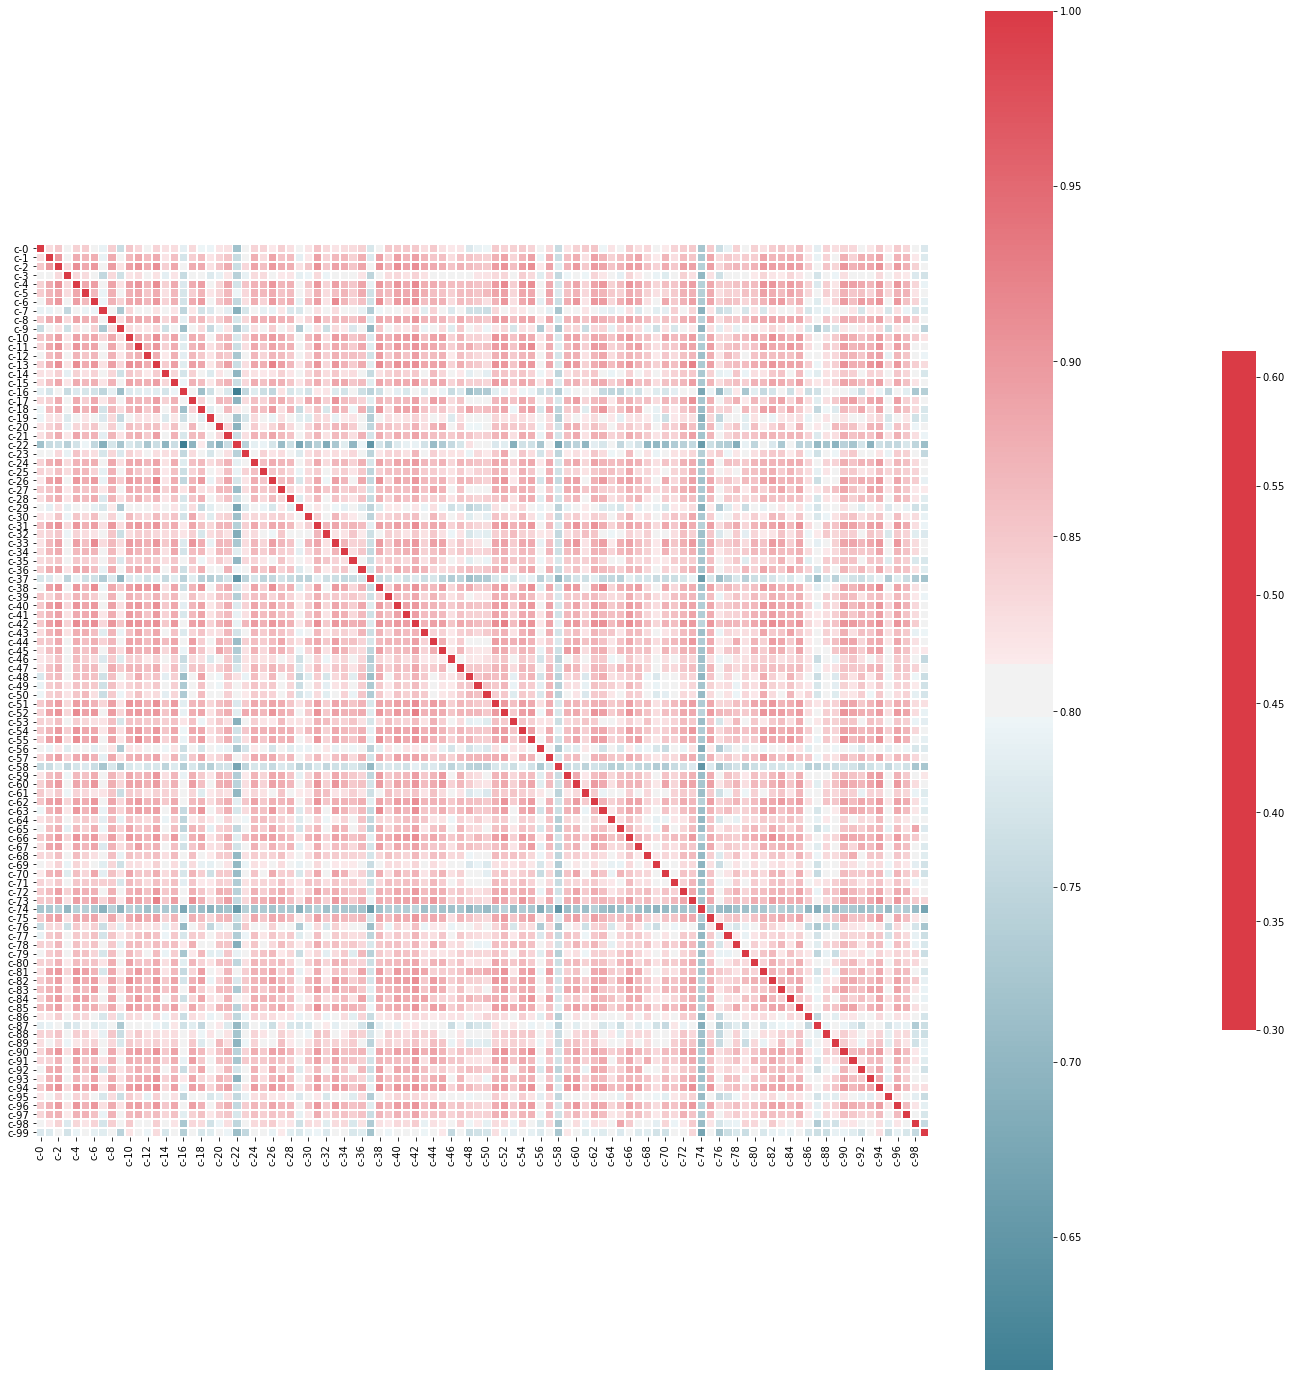

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

#Correlation matrix for Variables
cell=train_features_scored.loc[:, train_features_scored.columns.str.startswith('c-')]
corr = cell.corr(method='pearson')

# corr
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5})

ax = sns.heatmap(corr,linewidths=0.8,cmap=cmap)

Heavy presence of red in the plot above suggests that cell viability variables are highly correlated to each other. This information will be helpful for us in dimensionality reduction because we will be able to combine some of these variables since they are highly correlated to each other. We will look at this detail again in PCA section of the notebook.

In [24]:
# new colums to describe targets 
train_features_scored['sum_actions']=train_features_scored.iloc[:,-206:].sum(axis=1)
train_features_scored

fig = make_subplots(rows=3, cols=1,subplot_titles=('Sum of Drug Actions with different Dosages','Sum of Drug Actions with different Treatment Durations','Sum of Drug Actions with different Dosage Types'))
#fig = go.Figure()

fig.add_trace(go.Histogram(x=train_features_scored.loc[train_features_scored['cp_dose']=='D1','sum_actions'],name='Drug Dosage - D1'),row=1,col=1)
fig.add_trace(go.Histogram(x=train_features_scored.loc[train_features_scored['cp_dose']=='D2','sum_actions'],name='Drug Dosage - D2'),row=1,col=1)
#fig.update_layout(title_text='Sum of Drug Actions with different Dosages',xaxis_title_text='Sum of Drug Actions',yaxis_title_text='Count of Samples')
#fig.show()

#fig1 = go.Figure()
fig.add_trace(go.Histogram(x=train_features_scored.loc[train_features_scored['cp_time']==24,'sum_actions'],name='Treatment Duration - 24h'),row=2,col=1)
fig.add_trace(go.Histogram(x=train_features_scored.loc[train_features_scored['cp_time']==48,'sum_actions'],name='Treatment Duration - 48h'),row=2,col=1)
fig.add_trace(go.Histogram(x=train_features_scored.loc[train_features_scored['cp_time']==72,'sum_actions'],name='Treatment Duration - 72h'),row=2,col=1)
#fig.update_layout(title_text='Sum of Drug Actions with different Dosage Times',xaxis_title_text='Sum of Drug Actions',yaxis_title_text='Count of Samples')
#fig.show()

#fig2 = go.Figure()
fig.add_trace(go.Histogram(x=train_features_scored.loc[train_features_scored['cp_type']=='trt_cp','sum_actions'],name='Drug Type - trt_cp'),row=3,col=1)
fig.add_trace(go.Histogram(x=train_features_scored.loc[train_features_scored['cp_type']=='ctl_vehicle','sum_actions'],name='Drug Type - ctl_vehicle'),row=3,col=1)
#fig2.update_layout(title_text='Distribution ofActions with different Dosage Types',xaxis_title_text='Sum of Drug Actions',yaxis_title_text='Count of Samples')
#fig2.show()

One thing that stands out is that neither of the three variables we looked at - Drug Dosage, Drug Type & Treatment Duration have any difference in distribution of sum of MoAs for distinct values of the variable. Therefore its unlikely that these features will play an important role in model development

One thing that was mentioned above and has been verified through the output is that records with ctrl_vehicle as cp_type do not have any MoAs.

Another thing that can be observed is that majority of samples have 0 or 1 MoA associated with them. There are very few samples which have 2 or more MoAs associated with them. Thats why models can struggle for multiple MOAs.

### Dependent Variables - Mechanism of Action 

Since this is a multilabel classfication problem, we have 207 binary dependent variables in the data, with individual columns for each MoA. We have to predict whether a particular gene expression & cell viability sample corresponds to a specific MoAs. One single drug sample can have multiple mechanism of actions.

For the charts below, we summed up the values of individual MoAs to understand which MoAs are most & least commonly triggered in the dataset.

In [25]:
depsum=train_features_scored.iloc[:,-207:-1].sum(axis=0)
depsum=depsum.to_frame()
depsum.columns=['sum_actions_vert']
depsum['action']=depsum.index
depsum=depsum.reset_index(drop=True)
depsum=depsum.sort_values(by='sum_actions_vert',ascending=False)
depsum_top=depsum.head(10)
depsum_tail=depsum.tail(10)

import plotly.express as px
# df = px.data.tips()
fig2 = px.histogram(depsum, x="sum_actions_vert",opacity=0.6, title='Histogram of Sum of Actions across MoAs')
fig2.show()

In [26]:
fig=px.bar(depsum_top,y='sum_actions_vert',x='action',title='Most Common MoAs')
#fig.update_layout(height=350,width=800)
fig.show()

fig1=px.bar(depsum_tail,y='sum_actions_vert',x='action',title='Least Common MoAs')
#fig1.update_layout(height=350,width=800)

fig1.show()

Here are some of the observations from the plots above -

- The histogram for sum of actions across different MoAs is left skewed. Majority of MoAs have less than 100 samples where they were triggered. This is quite low given that we have almost 23k samples in our training dataset.
- nfkb_inhibitor & proteasome_inhibitor are the most common MoAs with counts of around 800+ and 700+ respectively
- Other popular MoAs for Cyclooxygenase_inhibitor, dopamine_receptor_antagonist, dna_inhibitor etc. have counts of 400+ records each
- Least common MoAs like steroid, elastase_inhibitor, laxative have less than 10 records each
- Each MoA has been triggered atleast once in the data
- Models may struggle with low triggered MoAs.
- Given the low triggers for some of the MoAs, it may be an interesting approach to set their predictions manually to zero and ignore them from the prediction.

Next we would look at correlation between MoAs to understand if a drug sample is likely to trigger multiple MoAs that are correlated to each other.

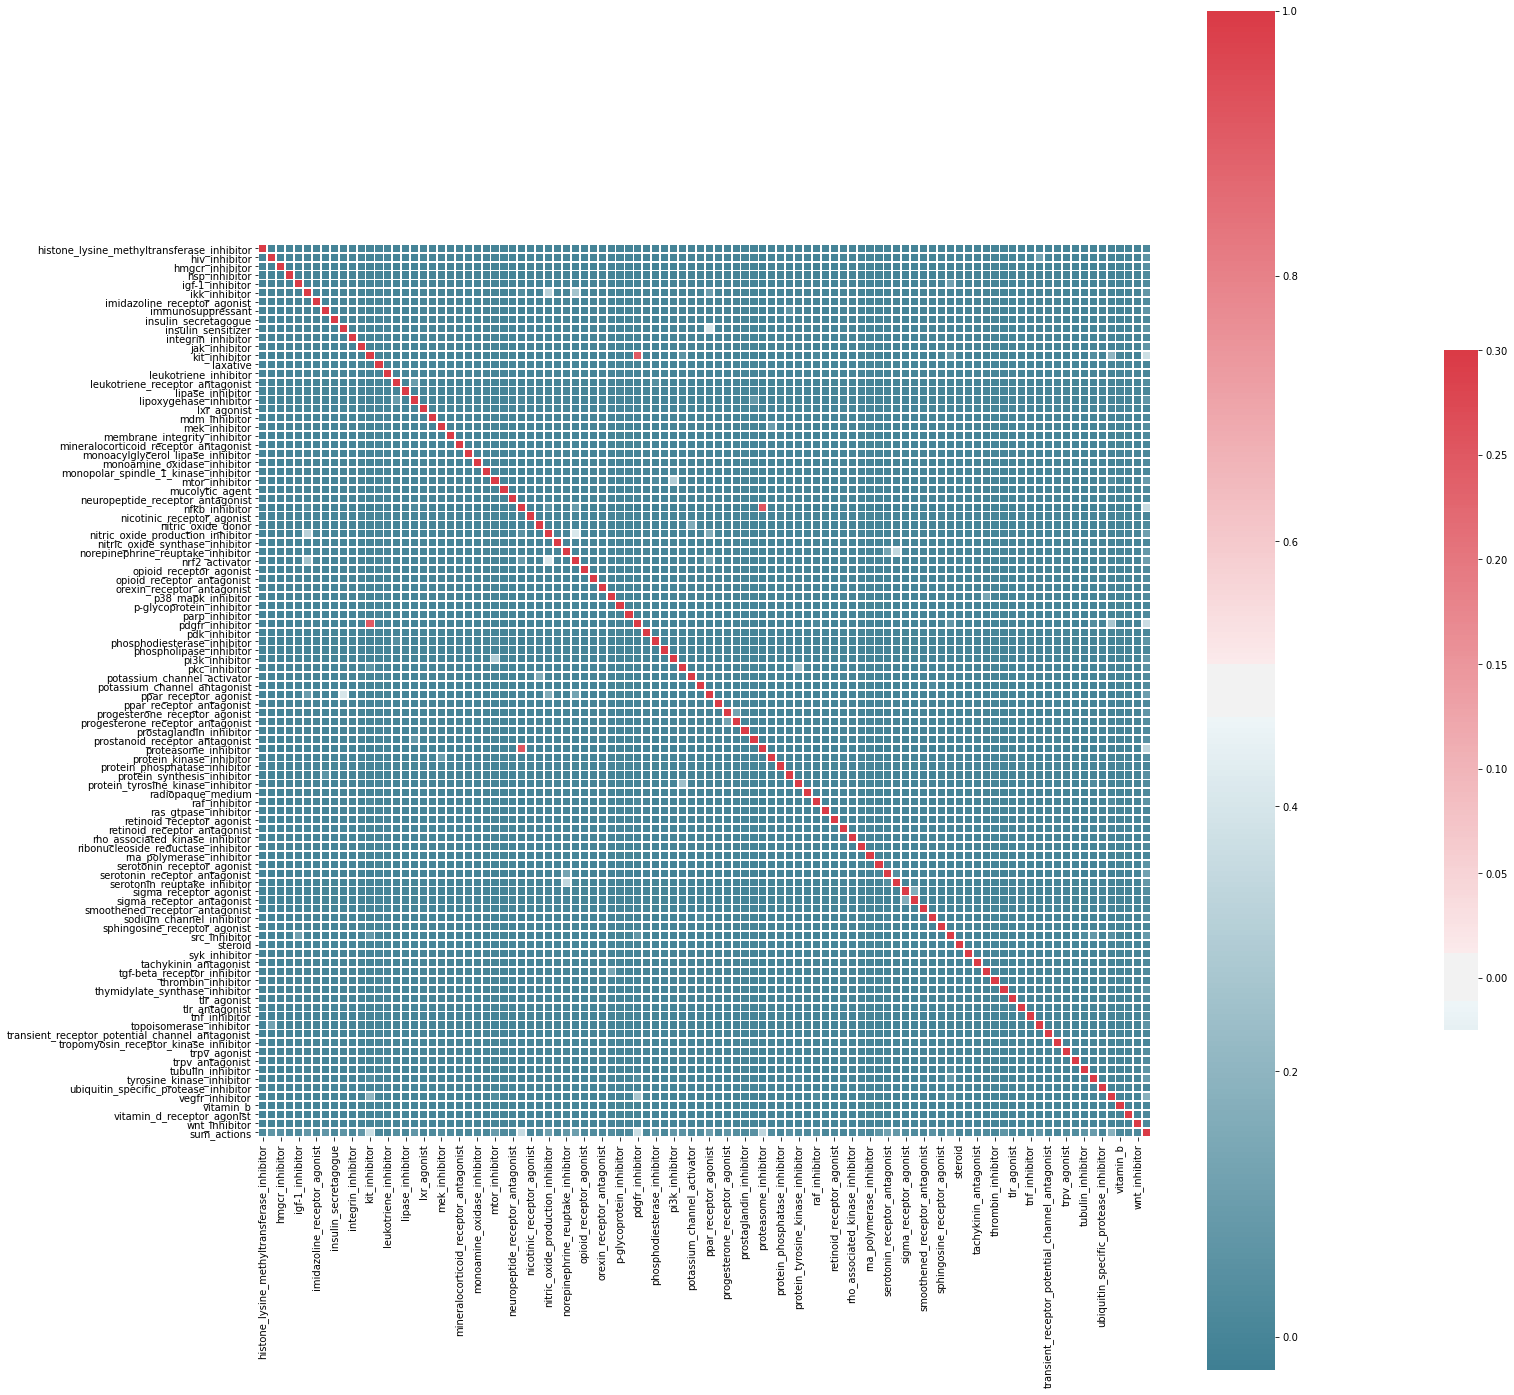

In [27]:
actions=train_features_scored.iloc[:,-100:]
corr = actions.corr(method='pearson')
# corr
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5})

ax = sns.heatmap(corr,linewidths=0.8,cmap=cmap)

The above correlation plot tells us that there is no correlation across MoAs, meaning that these MoAs are independent to each other and triggering of one MoA is unlikely to lead to triggering of other MoA because of zero correlation.